# Analyse Exploiratoire des données

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')

Matplotlib is building the font cache; this may take a moment.


In [2]:
print(data.shape)
print(data.head())

(15120, 56)
       Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0  242642       2881     130     22                               210   
1  309891       3005     351     14                               242   
2  287847       3226      63     14                               618   
3  516307       3298     317      8                               661   
4  124860       3080      35      6                               175   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              54                             1020   
1                             -16                             1371   
2                               2                             1092   
3                              60                              752   
4                              26                             3705   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            250             221             88  ...       

## Analyse Univarié

### Données manquantes

In [3]:
print(data.isnull().sum())

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


Il n'y a pas de données manquantes.

### Données redondantes

In [4]:
print(data.loc[data['Id'].duplicated(keep=False),:])
#Affiche les lignes de data qui ont le même 'Id'

Empty DataFrame
Columns: [Id, Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type7, Soil_Type8, Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type15, Soil_Type16, Soil_Type17, Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25, Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type]
Index: []

[0 rows x 56 columns]


Il n'y a pas a priori de données redondantes.

### Données aberantes

Les données aberantes peuvent être repérées pour les attributs quantitatifs. Deux indicateurs peuvent être utilisés :
- Le Z-score : c'est l'écart d'une donnée à la moyene exprimée en écart-type : $Z = \frac{x-\mu}{\sigma}$. Des données possédants un Z-score inférieur à -3 ou supérieur à 3 sont susceptibles d'être erronées.
- Le diagramme boite à moustache qui fait ressortir les valeurs supérieures à $Q_3 + 1.5\Delta Q$ ou inférieures à supérieures à $Q_1 - 1.5\Delta Q$, où $Q_1$, $Q_3$ et $\Delta Q$ sont respectivement le premier, troisième quartile et l'écart inter-quartile.

On va avant de calculer ces indicateurs, renormaliser les données entre 0 et 1 pour des questions de praticité d'affichage. Cette renormalisation ne modifie pas les indicateurs précédents.


In [5]:
data_prov = data.copy()
cols = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]

for col in cols:
    data_prov[col] = (data_prov[col]-np.min(data_prov[col]))/(np.max(data_prov[col])-np.min(data_prov[col]))

In [6]:
#Attributs à analyser

df_zscore = pd.DataFrame() #DataFrame qui contiendra les z-score
for col in cols:
    df_zscore[col] = stats.zscore(data_prov[col])
    print(f"{col} : max={np.max(df_zscore[col])} ; min={np.min(df_zscore[col])}")

Elevation : max=2.628547215189024 ; min=-2.080331292219321
Aspect : max=1.8604176572021156 ; min=-1.420011380506091
Slope : max=3.918678423255459 ; min=-1.9400194579005843
Horizontal_Distance_To_Hydrology : max=5.486048216311695 ; min=-1.0917209604757603
Vertical_Distance_To_Hydrology : max=8.431426108909506 ; min=-3.028549910489725
Horizontal_Distance_To_Roadways : max=3.822694256859576 ; min=-1.2914994584651323
Hillshade_9am : max=1.337292780005697 ; min=-5.255957570938961
Hillshade_Noon : max=1.541210556496279 ; min=-5.258068588515639
Hillshade_3pm : max=2.529337957970688 ; min=-2.9190667488810202
Horizontal_Distance_To_Fire_Points : max=4.986245605911669 ; min=-1.367864685306218


Les attributs qui sont les plus susceptibles de présenter des valeurs abberantes sont :
- 'Slope'
- 'Horizontal_Distance_To_Hydrology'
- 'Vertical_Distance_To_Hydrology'
- 'Horizontal_Distance_To_Roadways'
- 'Hillshade_9am'
- 'Hillshade_Noon'
- 'Horizontal_Distance_To_Fire_Points'

Pour completer ce premier constat, on va désormais afficher les boîtes à moustaches, ainsi que les histogrammes de chaque attributs.

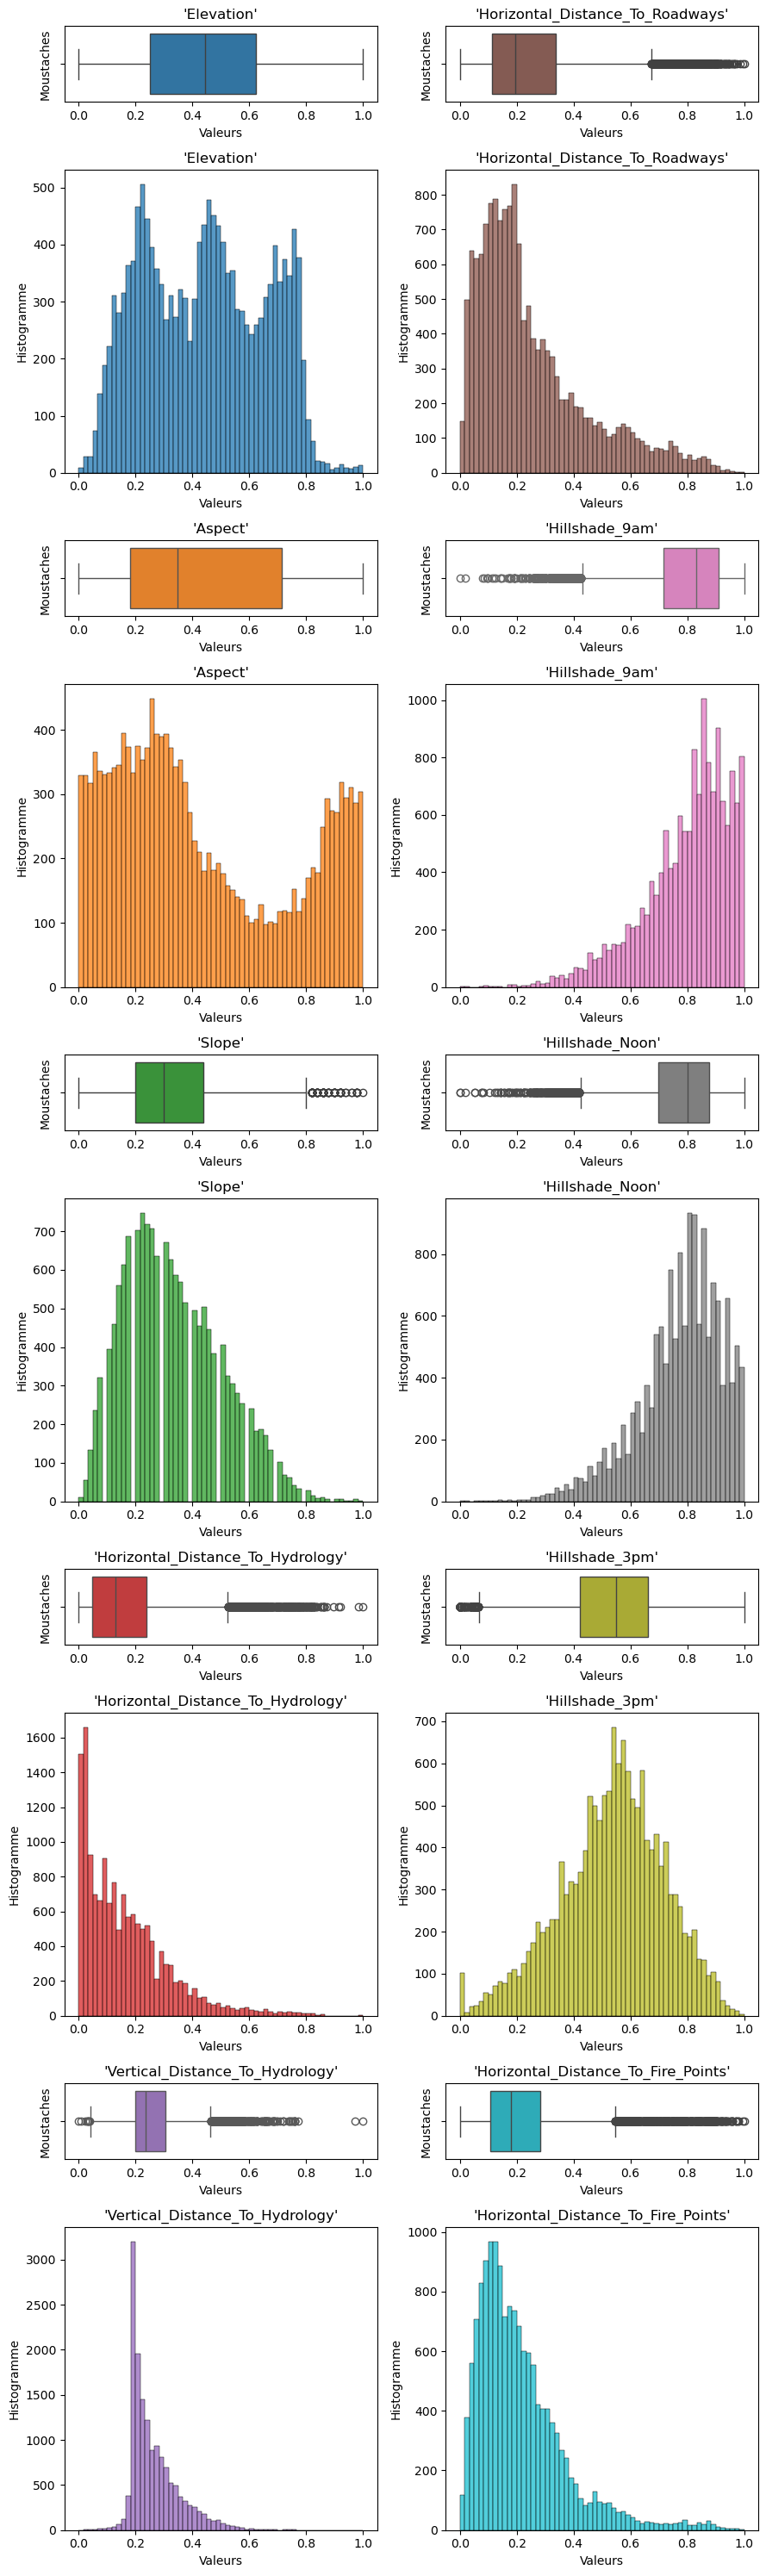

In [7]:
from matplotlib.gridspec import GridSpec

#Liste de couleurs pour faire plaisir aux yeux
colors = ['#1f77b4','#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#17becf']

fig = plt.figure(figsize=(9, 30))
#On fait 20 sous figures (10 boîte à moustache et 10 histogramme)
#Et on laisse plus de hauter pour les histogrammes pour la visibilité
gs = GridSpec(10, 2, figure=fig, height_ratios=[1, 4] * 5) 

# Boucle sur chaque attributs pour créer les sous-figures
for i in range(len(cols)):
    # Boîte à moustaches
    ax_box = fig.add_subplot(gs[(i * 2)%10 , (i * 2)//10])  # Position pour la boîte à moustaches
    sns.boxplot(data_prov[cols[i]], ax=ax_box, orient="h", color=colors[i])
    ax_box.set_title(f"'{cols[i]}'")
    ax_box.set_xlabel('Valeurs')
    ax_box.set_ylabel('Moustaches')

    # Histogramme
    ax_hist = fig.add_subplot(gs[(i * 2 + 1)%10, (i * 2 + 1)//10])  # Position pour l'histogramme
    sns.histplot(data_prov[cols[i]], bins=60, ax=ax_hist, color=colors[i])
    ax_hist.set_title(f"'{cols[i]}'")
    ax_hist.set_xlabel('Valeurs')
    ax_hist.set_ylabel('Histogramme')

# Ajustement de l'affichage
plt.tight_layout()
plt.show()


## Visualisation des données et étude des corrélations

### Patterns des attribus Hillshade (9h, 12h, 15h)

On a trois attributs qui sont Hillshade_9am, Hillshade_Noon et Hillshade_3pm. On peut s'attendre à ce qu'il y ait des patterns. On compare les distributions de ces trois attributs.

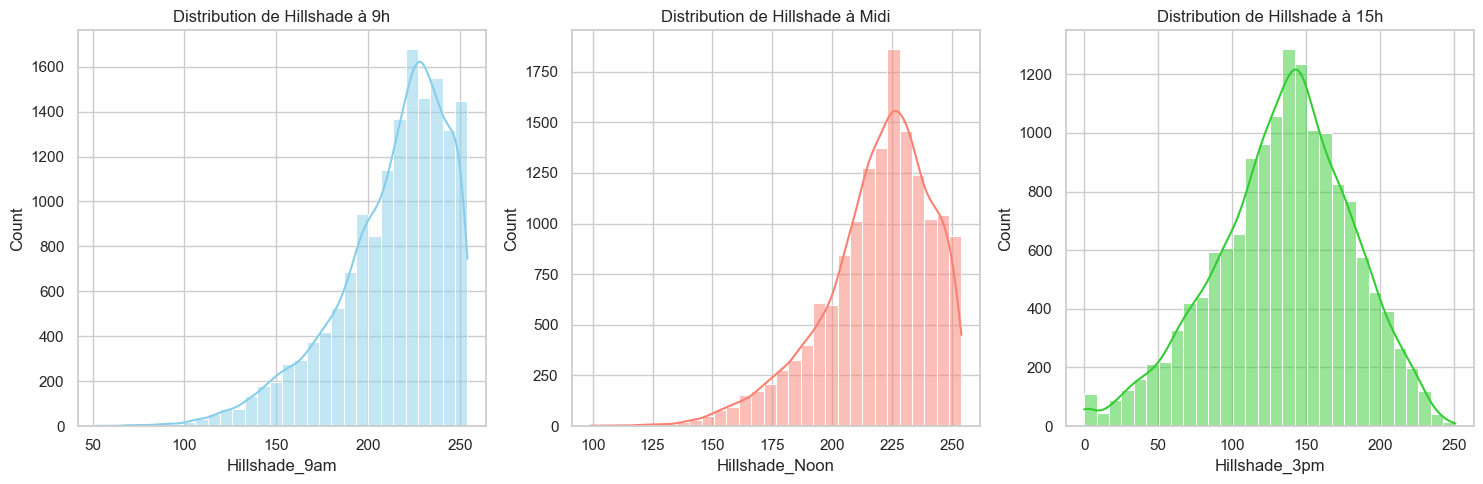

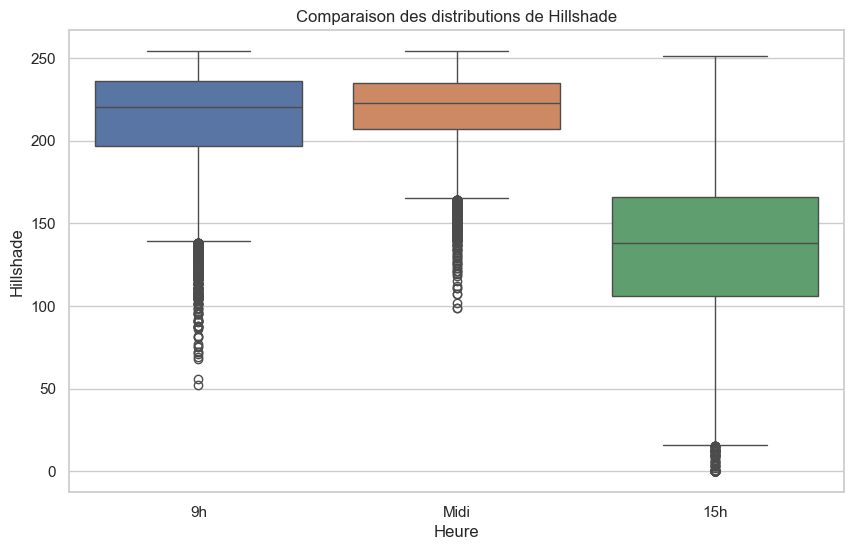

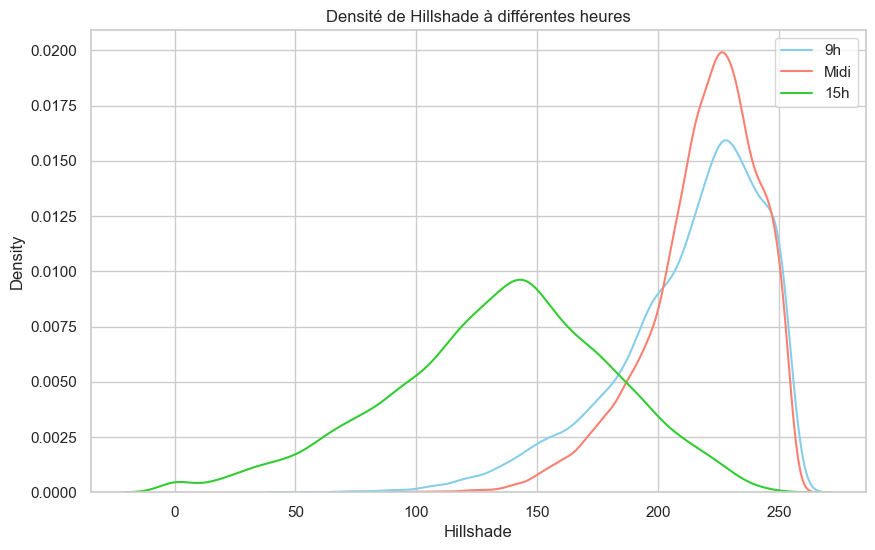

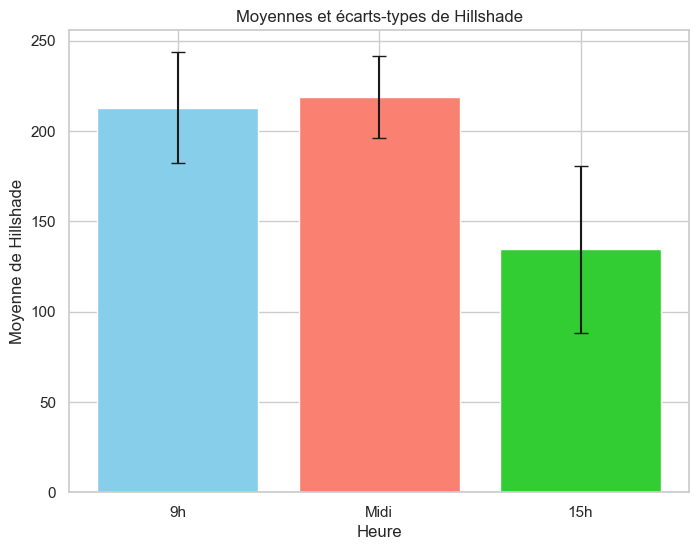

In [8]:
# Paramètres pour améliorer l'affichage des graphiques
sns.set(style="whitegrid")

# 1. Histogrammes individuels pour chaque variable Hillshade
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data['Hillshade_9am'], bins=30, kde=True, color="skyblue")
plt.title("Distribution de Hillshade à 9h")

plt.subplot(1, 3, 2)
sns.histplot(data['Hillshade_Noon'], bins=30, kde=True, color="salmon")
plt.title("Distribution de Hillshade à Midi")

plt.subplot(1, 3, 3)
sns.histplot(data['Hillshade_3pm'], bins=30, kde=True, color="limegreen")
plt.title("Distribution de Hillshade à 15h")
plt.tight_layout()
plt.show()

# 2. Boîtes à moustaches pour comparaison directe
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']])
plt.title("Comparaison des distributions de Hillshade")
plt.xlabel("Heure")
plt.ylabel("Hillshade")
plt.xticks([0, 1, 2], ['9h', 'Midi', '15h'])
plt.show()

# 3. Densités (KDE) pour les trois variables Hillshade
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Hillshade_9am'], label="9h", color="skyblue")
sns.kdeplot(data['Hillshade_Noon'], label="Midi", color="salmon")
sns.kdeplot(data['Hillshade_3pm'], label="15h", color="limegreen")
plt.title("Densité de Hillshade à différentes heures")
plt.xlabel("Hillshade")
plt.legend()
plt.show()

# 4. Comparaison des moyennes et écarts-types
means = [data['Hillshade_9am'].mean(), data['Hillshade_Noon'].mean(), data['Hillshade_3pm'].mean()]
std_devs = [data['Hillshade_9am'].std(), data['Hillshade_Noon'].std(), data['Hillshade_3pm'].std()]

# Bar plot des moyennes
plt.figure(figsize=(8, 6))
plt.bar(['9h', 'Midi', '15h'], means, yerr=std_devs, capsize=5, color=['skyblue', 'salmon', 'limegreen'])
plt.title("Moyennes et écarts-types de Hillshade")
plt.xlabel("Heure")
plt.ylabel("Moyenne de Hillshade")
plt.show()

Difficile de conclure quoi que ce soit. On peut voir que les distributions sont assez similaires, mais on ne peut pas dire grand chose de plus.

On va maintenant regarder les corrélations entre les attributs.

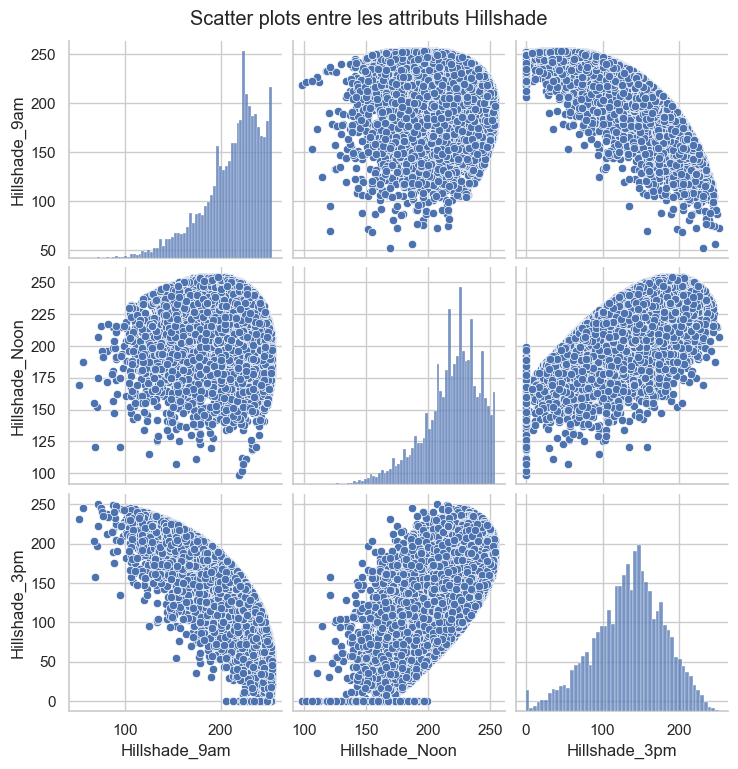

Matrice de corrélation des attributs Hillshade :
                 Hillshade_9am  Hillshade_Noon  Hillshade_3pm
Hillshade_9am        1.000000       -0.009118      -0.777561
Hillshade_Noon      -0.009118        1.000000       0.613839
Hillshade_3pm       -0.777561        0.613839       1.000000


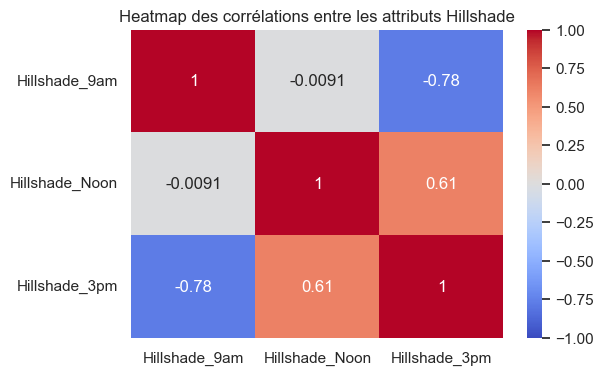

In [15]:
# Liste des colonnes Hillshade
hillshade_columns = ['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']

# On visualise les relations entre les attributs Hillshade avec des scatter plots
sns.pairplot(data[hillshade_columns])
plt.suptitle("Scatter plots entre les attributs Hillshade", y=1.02)
plt.show()

# On calcule la matrice de corrélation pour les attributs Hillshade
hillshade_corr = data[hillshade_columns].corr()
print("Matrice de corrélation des attributs Hillshade :\n", hillshade_corr)

# 3. On visualise la matrice de corrélation avec une heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(hillshade_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Heatmap des corrélations entre les attributs Hillshade")
plt.show()

Bien que HillShade_9am et Hillshade_Noon aient la même distribution, ils sont peu corrélés: $-0,0091$ est vraiment très faible et suggère qu'il n,y a pratiquement aucune relation entre les deux.

La corrélation positive modérée entre Hillshade_Noon et Hillshade_3pm suggère que ces deux heures d'ombrage partagent des similarités, ce qui peut être utile pour simplifier la modélisation ou l’analyse.

La corrélation est de $-0,78$ entre HillShade_9am et Hillshade_3pm, ce qui indique une forte corrélation négative entre ces deux variables. Cela confirme ce que l'on a observé dans le scatter plot : les ombrages du matin et de l'après-midi sont généralement inversés

### Analyse des classes (type de couverture forestière) 

On analyse la distribution des classes cible (le type de couverture forestière) pour voir si elle est équilibrée ou déséquilibrée.

Distribution des classes cibles :
Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: count, dtype: int64


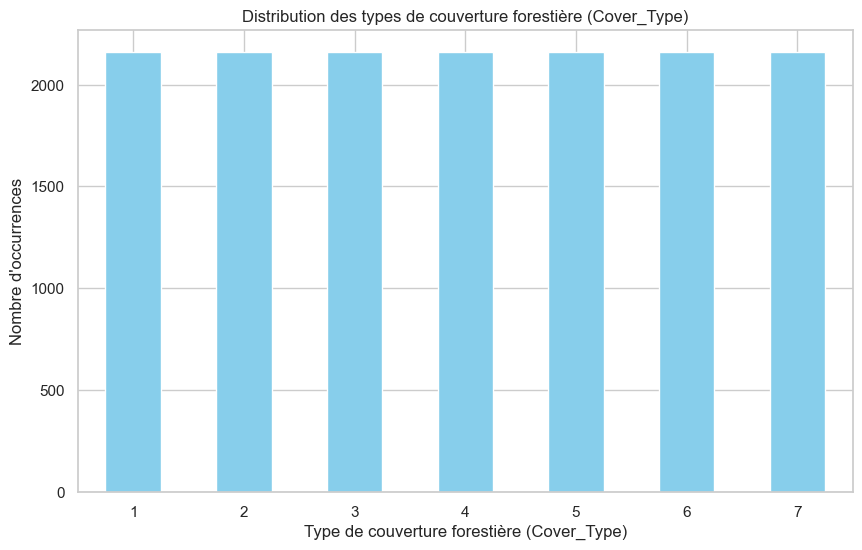

In [9]:
# On compte les occurrences de chaque classe
class_counts = data['Cover_Type'].value_counts()
print("Distribution des classes cibles :")
print(class_counts)

# Bar plot de la distribution des classes
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution des types de couverture forestière (Cover_Type)")
plt.xlabel("Type de couverture forestière (Cover_Type)")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=0)
plt.show()

On remarque que les classes son équilibrées. On peut donc utiliser des métriques de classification classiques. Cependant, on peut imaginer que cela n'est pas le cas dans la réalité et donc dans les données de test. Il faudra donc peut-être prendre en compte que les données ne sont pas aussi équilibrées que dans le jeu d'entraînement.

### Analyse des Variables Binaires (Soil_Type et Wilderness_Area)

#### Soil_Type

On veut comprendre la répartition des différents types de sol dans les données. 

Si certains types de sol sont plus fréquents dans certains types de couvert forestier, cela pourrait être un indicateur important pour prédire la classe cible (Cover_Type).

Connaître la distribution des types de sol peut aider à choisir la bonne façon de les intégrer dans le modèle (par exemple, en tant que variables binaires individuelles ou combinées).


Nombre d'occurrences pour chaque type de sol :
Soil_Type1      339
Soil_Type2      627
Soil_Type3     1006
Soil_Type4      839
Soil_Type5      181
Soil_Type6      679
Soil_Type7        1
Soil_Type8        2
Soil_Type9        4
Soil_Type10    2096
Soil_Type11     376
Soil_Type12     260
Soil_Type13     513
Soil_Type14     173
Soil_Type15       0
Soil_Type16     106
Soil_Type17     640
Soil_Type18      44
Soil_Type19      53
Soil_Type20     132
Soil_Type21      10
Soil_Type22     332
Soil_Type23     742
Soil_Type24     265
Soil_Type25       6
Soil_Type26      48
Soil_Type27       8
Soil_Type28       7
Soil_Type29    1308
Soil_Type30     736
Soil_Type31     304
Soil_Type32     663
Soil_Type33     619
Soil_Type34      18
Soil_Type35     103
Soil_Type36      14
Soil_Type37      32
Soil_Type38     744
Soil_Type39     634
Soil_Type40     456
dtype: int64


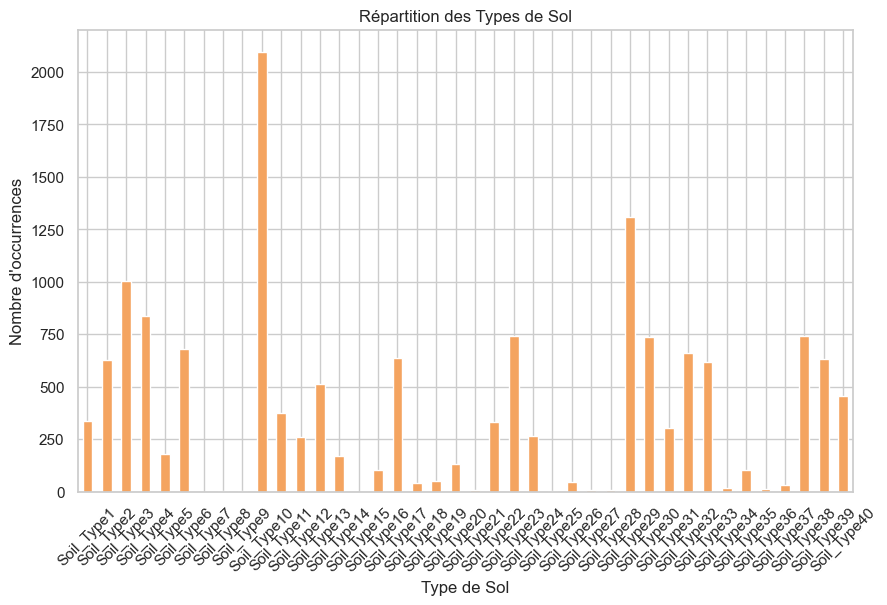

In [10]:
# Colonnes de types de sol
soil_columns = [col for col in data.columns if col.startswith('Soil_Type')]

# On compte les occurences
soil_counts = data[soil_columns].sum()
print("Nombre d'occurrences pour chaque type de sol :")
print(soil_counts)

plt.figure(figsize=(10, 6))
soil_counts.plot(kind='bar', color='sandybrown')
plt.title("Répartition des Types de Sol")
plt.xlabel("Type de Sol")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)
plt.show()

Les types de sol fréquents sont : 10, 29, 3, 4, 38, 30

Les types sols avec 0 occurences sont : 15, 7, 8, 9, 25, 28, 27

Proposition pour gérer cela : 
- combiner certains types de sol extrêmement rares
- combiner les types de sol qui sont très similaires : Chaque numéros correspond à une description, on peut regrouper les numéros avec des mots clés similaires dans leur description
- faire de la pondération, utiliser des poids pour équilibrer lors de l'apprentissage. Cela pourrait être pertinent si ces types rares sont néanmoins importants pour certaines classes de couverture forestière


#### Wilderness_Area

On étudie la répartition des zones de nature sauvage (Wilderness_Area), de la même manière que les types de sol.

Nombre d'occurrences pour chaque zone de nature sauvage :
Wilderness_Area1    3568
Wilderness_Area2     569
Wilderness_Area3    6302
Wilderness_Area4    4681
dtype: int64


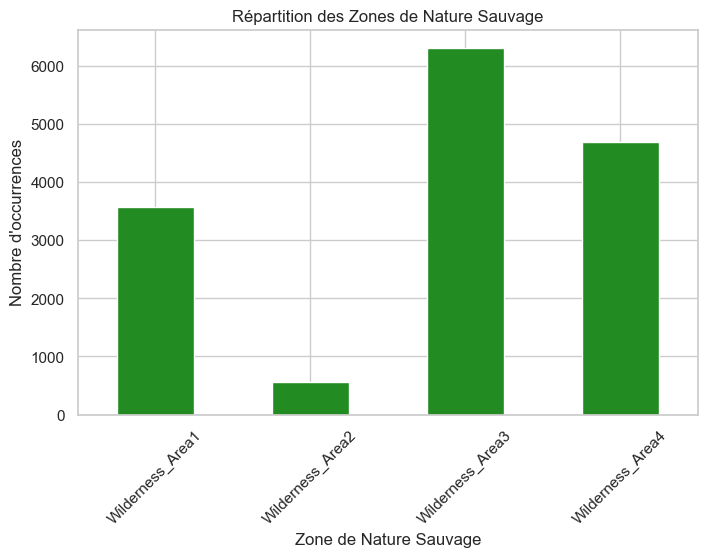

In [13]:
# Colonnes de Wilderness Area
wilderness_columns = [col for col in data.columns if col.startswith('Wilderness_Area')]

# On compte les occurrences pour chaque zone de nature sauvage
wilderness_counts = data[wilderness_columns].sum()
print("Nombre d'occurrences pour chaque zone de nature sauvage :")
print(wilderness_counts)

plt.figure(figsize=(8, 5))
wilderness_counts.plot(kind='bar', color='forestgreen')
plt.title("Répartition des Zones de Nature Sauvage")
plt.xlabel("Zone de Nature Sauvage")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)
plt.show()

Wilderness_Area2 est beaucoup moins fréquente que les 3 autres. Cela pourrait être un indicateur important pour prédire la classe cible (Cover_Type).

On regarde alors la corrélation entre ces attribus et la classe cible à l'aide d'une table de contingence.

Cover_Type           1     2     3     4     5     6     7
Wilderness_Area                                           
Wilderness_Area1  1068  1105     0     0   862     0   533
Wilderness_Area2   237    85     0     0     0     0   247
Wilderness_Area3   855   949   856     0  1298   964  1380
Wilderness_Area4     0    21  1304  2160     0  1196     0


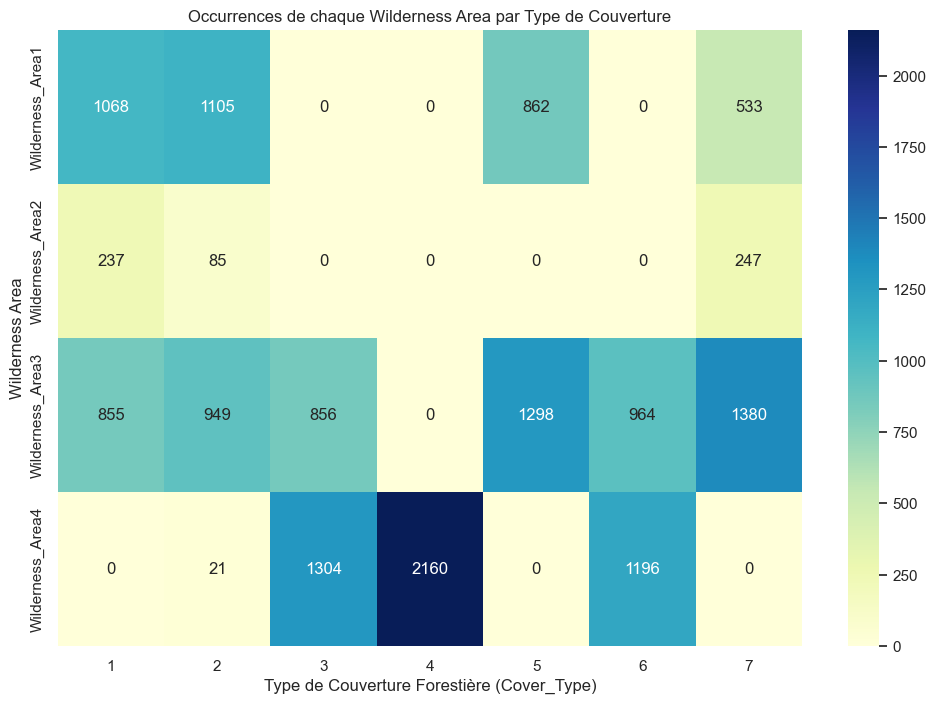

In [ ]:
# On compte les occurrences de chaque Cover_Type dans chaque Wilderness_Area
wilderness_cover_counts = data.melt(id_vars='Cover_Type', value_vars=wilderness_columns, 
                                    var_name='Wilderness_Area', value_name='Presence')
wilderness_cover_counts = wilderness_cover_counts[wilderness_cover_counts['Presence'] == 1]

# On crée la table de contingence
contingency_table = wilderness_cover_counts.groupby(['Wilderness_Area', 'Cover_Type']).size().unstack(fill_value=0)
print(contingency_table)

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Occurrences de chaque Wilderness Area par Type de Couverture")
plt.xlabel("Type de Couverture Forestière (Cover_Type)")
plt.ylabel("Wilderness Area")
plt.show()

Cette analyse peut aider à affiner les modèles en mettant l'accent sur certaines zones de nature sauvage pour des types de couvertures particuliers, ce qui améliore la précision des prédictions.

### Analyse de la corrélation entre les variables continues

### Corrélation entre Wilderness_Area et Elevation

### Attributs susceptibles d'avoir le plus grand impact

# Analyse des données